In [2]:
import pandas as pd
import numpy as np
from keras.layers import LSTM

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model

from keras.utils.generic_utils import get_custom_objects
from keras.layers.core import Activation


In [3]:
exchangerate_data = pd.read_csv('LastCHF_USD99-17Daily.csv')
exchangerate_data["Date"] = pd.to_datetime(exchangerate_data["Date"])# 1 USD = X CHF
ind_exchangerate_data = exchangerate_data.set_index(["Date"], drop=True)

In [4]:
ind_exchangerate_data.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2017-12-01,1.0240,1.0168,1.0273,1.0131,NaN,0.72%
2017-11-30,1.0167,1.0153,1.0188,1.0118,NaN,0.11%
2017-11-29,1.0156,1.0160,1.0186,1.0131,NaN,-0.04%
2017-11-28,1.0160,1.0189,1.0203,1.0149,NaN,-0.27%
2017-11-27,1.0188,1.0211,1.0229,1.0184,NaN,-0.18%


In [5]:
data_frame = ind_exchangerate_data.sort_index(axis=1 ,ascending=True)
data_frame = data_frame.iloc[::-1]
data_frame.head()
#data are reversed

,Change %,High,Low,Open,Price,Vol.
Date,,,,,,
1999-01-04,0.55%,0.7318,0.7315,0.7315,0.7318,NaN
1999-01-05,-0.33%,0.7294,0.7291,0.7291,0.7294,NaN
1999-01-06,-1.55%,0.7181,0.7180,0.7180,0.7181,NaN
1999-01-07,1.04%,0.7256,0.7254,0.7254,0.7256,NaN
1999-01-08,-1.17%,0.7171,0.7168,0.7168,0.7171,NaN


             Price
Date              
1999-01-04  0.7318
1999-01-05  0.7294
1999-01-06  0.7181
1999-01-07  0.7256
1999-01-08  0.7171
...            ...
2017-11-27  1.0188
2017-11-28  1.0160
2017-11-29  1.0156
2017-11-30  1.0167
2017-12-01  1.0240

[4932 rows x 1 columns]


<AxesSubplot: xlabel='Date'>

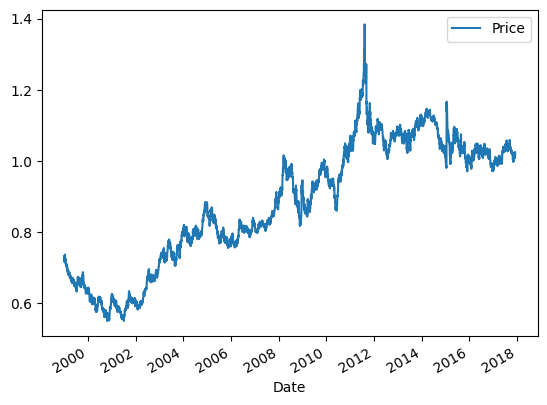

In [6]:
df = data_frame[["Price"]]
print(df)
df.plot()

             Price
Date              
1999-01-04  0.7318
1999-01-05  0.7294
1999-01-06  0.7181
1999-01-07  0.7256
1999-01-08  0.7171
...            ...
2015-12-28  1.0119
2015-12-29  1.0070
2015-12-30  1.0113
2015-12-31  0.9980
2016-01-01  0.9985

[4432 rows x 1 columns]


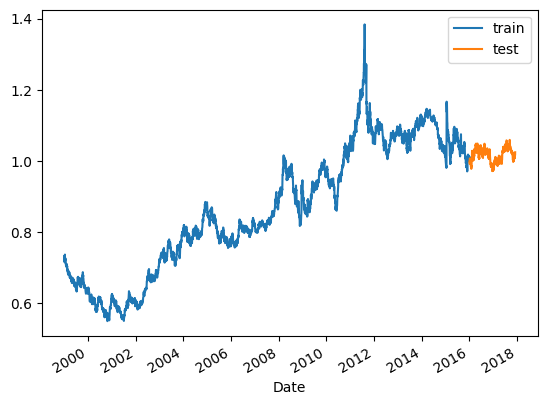

In [7]:
split_date = pd.Timestamp('01-02-2016')

train = df.loc[:split_date]
print(train)
test = df.loc[split_date:]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

500
<class 'numpy.ndarray'>


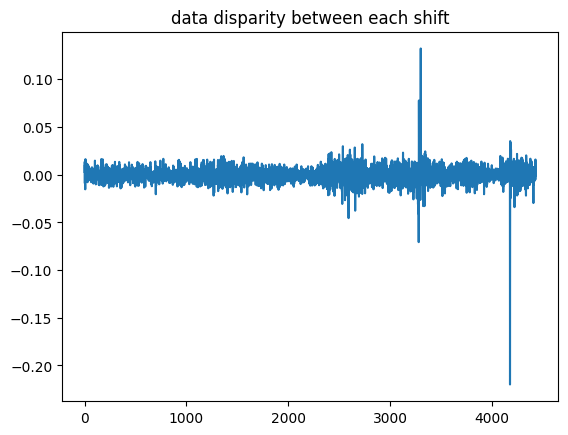

In [8]:
#Data transformation
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
print(len(test))
print(type(train_sc[1]))
test_sc = sc.transform(test)
#ANN

#Daily forecast change the number of day for it with changing the number in []
X_train = train_sc[:-1]
y_train = train_sc[1:]
plt.plot(X_train-y_train)
plt.title("data disparity between each shift")

X_test = test_sc[:-1]
y_test = test_sc[1:]
# a=[1,5,9,11,2,66] => a[:-1] = [1, 5, 9, 11, 2] input            
# a=[1,5,9,11,2,66] => a[1:] = [5, 9, 11, 2, 66] target 

In [9]:
def complie(dataloader, opti):
    epoch_loss = 0
    if is_training:
        model.train()
    else:
        model.eval()
    for idx, (x, y) in enumerate(dataloader):
        if is_training:
            optimizer.zero_grad()
        batchsize = x.shape[0]
        x = x.to(config["train"]["device"])
        y = y.to(config["train"]["device"])
        loss = criterion(out.contiguous(), y.contiguous())
        out = model(x)
        if is_training:
            loss.backward()
            optimizer.step()
        epoch_loss += (loss.detach().item() / batchsize)
    lr = scheduler.get_last_lr()[0]
    return epoch_loss, lr
def fit(a,b,c,d,e,f,g):
    compute_loss_source(a,b,e)
    compute_loss_target(b,c,g)
    
def compute_loss_source(s_labels, l_source_w, l_source_s):
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    w_loss = loss(s_labels, l_source_w)
    s_loss = loss(s_labels, l_source_s)
    return w_loss + s_loss
def compute_loss_target(t_pseudo_labels_w, l_target_s, shift):
    loss_func = keras.losses.CategoricalCrossentropy(from_logits=True, reduction="none")
    target_pseudo_labels_w = tf.stop_gradient(t_pseudo_labels_w)
    target_loss = loss_func(t_pseudo_labels_w, l_target_s)
    mask = tf.cast(shift, t_loss.dtype)
    target_loss *= shift
    return tf.reduce_mean(target_loss, 0)

In [10]:
#private activation function 
def custom_activation(x):
    return (2/(1 + Ker.exp(-2*x))-1)
     
get_custom_objects().update({'custom_activation': Activation(custom_activation)})

In [11]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

ANN

In [ ]:
K.clear_session()

model = Sequential()
model.add(Dense(5, input_dim=1, activation='relu'))
model.add(Dense(2, input_dim=1, activation='relu'))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
early = EarlyStopping(monitor='loss', patience=2, verbose=1)
#model.compile(loss='binary_crossentropy', optimizer='adam')
history = model.fit(X_train, y_train, epochs= 4, batch_size= 1,verbose = 1, callbacks= [early], shuffle= False)
#Epoch: One pass through all of the rows in the training dataset
#Batch: One or more samples considered by the model within an epoch before weights are updated


Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 2)                 12        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4


2022-12-12 11:16:50.984923: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-12 11:16:50.985650: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-12-12 11:16:51.189870: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  17/4431 [..............................] - ETA: 13s - loss: 0.0428  

2022-12-12 11:16:51.344328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4431/4431 [==============================] - 13s 3ms/step - loss: 0.0016
Epoch 2/4
2368/4431 [===============>..............] - ETA: 5s - loss: 0.0030

In [108]:
y_pred_test_ann = model.predict(X_test)
y_train_pred_ann = model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_ann)))
r2_train = r2_score(y_train, y_train_pred_ann)
print("R2 score on the Train set:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("R2 score on the Test set :\t{:0.3f}".format(r2_score(y_test, y_pred_test_ann)))
r2_test = r2_score(y_test, y_pred_test_ann)
print("R2 score on the Test set:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

 34/115 [=======>......................] - ETA: 0s

2022-12-02 12:19:38.964723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


115/115 [==============================] - 0s 2ms/step
The R2 score on the Train set is:	-0.154
R2 score on the Train set:	-0.154

R2 score on the Test set :	0.287
R2 score on the Test set:	0.287


In [109]:
model.save('ANN_NonShift.h5')

LTSM

In [13]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [14]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(11, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=4, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

Metal device set to: Apple M1 Pro


2022-12-11 15:58:48.154430: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-11 15:58:48.155135: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/4


2022-12-11 15:58:48.445777: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-11 15:58:48.711086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4431/4431 [==============================] - 34s 8ms/step - loss: 2.7546e-04
Epoch 2/4
4431/4431 [==============================] - 32s 7ms/step - loss: 1.6678e-04
Epoch 3/4
4431/4431 [==============================] - 33s 7ms/step - loss: 1.4384e-04
Epoch 4/4
  1/139 [..............................] - ETA: 1s

2022-12-11 16:01:00.082943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


139/139 [==============================] - 1s 5ms/step
The R2 score on the Train set is:	0.864
The Adjusted R2 score on the Train set is:	0.864

The R2 score on the Test set is:	0.796
The Adjusted R2 score on the Test set is:	0.796


In [15]:
model_lstm.save('LSTM_NonShift.h5')

Résultat

In [16]:
model_ann = load_model('ANN_NonShift.h5')
model_lstm = load_model('LSTM_NonShift.h5')

In [17]:
score_ann= model_ann.evaluate(X_test, y_test, batch_size=1)
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

 81/499 [===>..........................] - ETA: 0s - loss: 0.0032

2022-12-11 16:02:00.053611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 41/499 [=>............................] - ETA: 1s - loss: 1.6242e-04

2022-12-11 16:02:01.056747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


499/499 [==============================] - 2s 3ms/step - loss: 1.0691e-04


In [18]:
print('ANN: %f'%score_ann)
print('LSTM: %f'%score_lstm)#if predictions are totally off => higher number. If they're pretty good => lower number
y_pred_test_ANN = model_ann.predict(X_test)

ANN: 0.003129
LSTM: 0.000107
16/16 [==============================] - 0s 3ms/step


2022-12-11 16:02:04.174487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [19]:
y_pred_test_ANN = model_ann.predict(X_test)
y_pred_test_LSTM = model_lstm.predict(X_tst_t)


16/16 [==============================] - 0s 4ms/step


2022-12-11 16:02:09.190562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


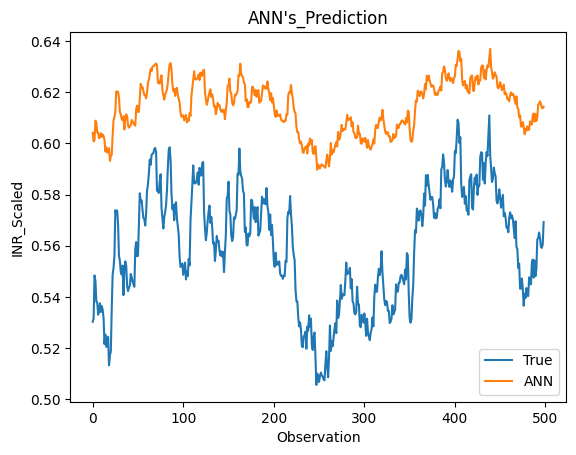

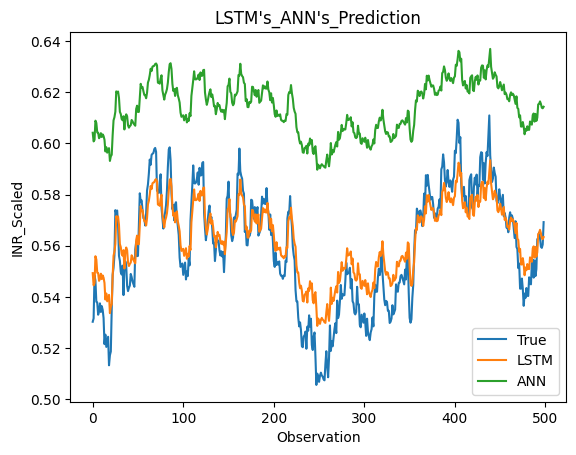

In [20]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_ANN, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.plot(y_pred_test_ANN, label='ANN')
plt.title("LSTM's_ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

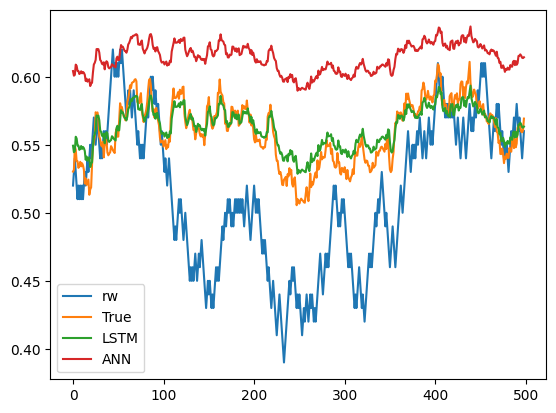

In [41]:

from random import seed
from random import random
from matplotlib import pyplot
seed(6)
random_walk = list()
random_walk.append(0.52)
for i in range(1, 499):
	movement = -0.01 if random() < 0.5 else 0.01
	value = random_walk[i-1] + movement
	random_walk.append(value)
plt.plot(random_walk, label='rw')
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.plot(y_pred_test_ANN, label='ANN')

plt.legend()

pyplot.show()

In [42]:
import math
MSE = np.square(np.subtract(y_test,y_pred_test_ANN)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error ANN:\n")
print(RMSE*100)
MSE = np.square(np.subtract(y_test,y_pred_test_LSTM)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error LSTM:\n")
print(RMSE*100)

MSE = np.square(np.subtract(y_test,random_walk)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error Random Walk:\n")
print(RMSE*100)


Root Mean Square Error ANN:

5.593484873154661
Root Mean Square Error LSTM:

1.0339923036842709
Root Mean Square Error Random Walk:

7.431995636539086


In [1]:
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
list_of_numbers = list(range(1, len(y_test)+1))
df = pd.DataFrame(y_test, columns = ['Index Value'])#True
df2 = pd.DataFrame(y_pred_test_ANN, columns = ['Index Value'])#ANN
df3 = pd.DataFrame(y_pred_test_LSTM, columns = ['Index Value'])#LSTM
df4 = pd.DataFrame(random_walk, columns = ['Index Value'])


NameError: name 'y_test' is not defined

In [39]:
# import graph_objects from plotly package
import plotly.graph_objects as go
 
# import make_subplots function from plotly.subplots
# to make grid of plots
from plotly.subplots import make_subplots
 
# use specs parameter in make_subplots function
# to create secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
 
# plot a scatter chart by specifying the x and y values
# Use add_trace function to specify secondary_y axes.
fig.add_trace(
    go.Scatter(x=list_of_numbers, y=df['Index Value'], name="CHF/USD"),
    secondary_y=False)
 
# Use add_trace function and specify secondary_y axes = True.
fig.add_trace(
    go.Scatter(x=list_of_numbers, y=df2['Index Value'], name="ANN"),
   secondary_y=False,)

fig.add_trace(
    go.Scatter(x=list_of_numbers, y=df3['Index Value'], name="LSTM"),
    secondary_y=False,)
fig.add_trace(
    go.Scatter(x=list_of_numbers, y=df4['Index Value'], name="Random walk"),
    secondary_y=False,)
 
# Adding title text to the figure
fig.update_layout(
    title_text="           Errors (abs(Original − Predicted))     "
)
 
# Naming x-axis
fig.update_xaxes(title_text="Closing day")
fig.update_yaxes(title_text="Difference")

 
# Naming y-axes
#fig.update_yaxes(title_text="<b>Main</b> Y - axis ", secondary_y=False)f1
#fig.update_yaxes(title_text="<b>secondary</b> Y - axis ", secondary_y=True)